# 1. Imports

- Please change in the below cell the path to your local directory where this repository is located:

Example `sys.path.append(r"C:\Users\USERNAME\Documents\GitHub")`

In [1]:
path = r"C:\Users\Fer\Documents\GitHub"

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import pycytominer
import seaborn as sns
import matplotlib.pyplot as plt
import easygui as eg
import sys

sys.path.append(path)
from scripts_notebooks_fossa.individual_feature_and_statistics import feat_stat

%load_ext autoreload
%autoreload 2

# 1. Inputs

In [3]:
myfile = eg.fileopenbox(msg="Choose a file")
print('Filename', myfile)

Filename F:\2023_01_04_AgNPContinuousAcute_fossa_Cimini\workspace\profiles\2022_06_05_CellPainting\2022_06_05_CellPainting_normalized_negcon_time_feature_select_pycombat_plates.csv


In [4]:
df = pd.read_csv(myfile)
df.head()

,Metadata_Compound_concentration,Metadata_Plate,Metadata_Well,Metadata_cell_count,Metadata_plate_map_name,Metadata_Compound,Metadata_NPSize_nm,Metadata_Cell,Metadata_Time,Metadata_Concentration_mgml,...,Nuclei_Texture_SumAverage_AGP_20_01_256,Nuclei_Texture_SumEntropy_DNA_20_03_256,Nuclei_Texture_SumEntropy_Mito_10_00_256,Nuclei_Texture_SumVariance_DNA_20_02_256,Nuclei_Texture_SumVariance_DNA_20_03_256,Nuclei_Texture_SumVariance_ER_10_00_256,Nuclei_Texture_SumVariance_Mito_20_01_256,Nuclei_Texture_Variance_ER_20_02_256,Nuclei_Texture_Variance_ER_20_03_256,Nuclei_Texture_Variance_Mito_20_00_256
0,Non-treated_0_30,220605_085428_Plate_1,B10,543,platemap_rep1,Non-treated,0,Huh7,30,0.0,...,0.666943,0.514651,0.418927,-0.510063,0.093691,-0.326963,-1.129765,-1.907206,-0.500610,-1.218512
1,Non-treated_0_30,220605_085428_Plate_1,B11,453,platemap_rep1,Non-treated,0,Huh7,30,0.0,...,0.183475,0.020484,-0.422209,0.004693,0.018143,0.194013,-0.862310,-0.358561,0.864939,-1.101234
2,Non-treated_0_1,220605_085428_Plate_1,B2,669,platemap_rep1,Non-treated,0,Huh7,1,0.0,...,1.871568,0.020484,5.520379,0.135718,0.093691,0.194013,2.941955,-1.907206,-0.006185,1.495709
3,Non-treated_0_1,220605_085428_Plate_1,B3,672,platemap_rep1,Non-treated,0,Huh7,1,0.0,...,0.459703,-4.405884,-0.335352,-5.728848,-5.342787,-1.017251,-1.129765,-6.103227,-2.804204,-1.101234
4,Non-treated_0_1,220605_085428_Plate_1,B4,630,platemap_rep1,Non-treated,0,Huh7,1,0.0,...,1.150411,0.514651,3.237589,0.519450,0.776609,2.173136,0.613227,3.760048,3.587757,0.129134


In [5]:
#Select which Metadata cols to join and paste into cols_to_join
#new_col is the col name we are using later
cols_to_join = ["Metadata_Compound", "Metadata_NPSize_nm"]

df, new_col = feat_stat.col_generator(df, cols_to_join = cols_to_join)

#just remove the 0 for the non-treated wells
df[new_col] = df[new_col].str.replace(r' 0', '', regex=True)
df[new_col].unique()

NPSize_nm
Names of the compounds + concentration:  ['Non-treated 0' 'AgNP 40' 'AgNP 100']


In [62]:
#create a column for the labeling
cols_to_join = [new_col, "Metadata_Time"]

df, label_col = feat_stat.col_generator(df, cols_to_join = cols_to_join)
df[label_col] = df[label_col] + ' day(s)'
df[label_col].unique()

Time
Names of the compounds + concentration:  ['Non-treated 30' 'Non-treated 1' 'AgNP 40 30' 'AgNP 40 1' 'AgNP 100 30'
 'AgNP 100 1' 'Non-treated 15' 'AgNP 40 15' 'AgNP 100 15']


array(['Non-treated 30 day(s)', 'Non-treated 1 day(s)',
       'AgNP 40 30 day(s)', 'AgNP 40 1 day(s)', 'AgNP 100 30 day(s)',
       'AgNP 100 1 day(s)', 'Non-treated 15 day(s)', 'AgNP 40 15 day(s)',
       'AgNP 100 15 day(s)'], dtype=object)

In [53]:
treatment_colors=['#b2beB5', 
                  '#0d0887',
                  '#fb9f3a']

time_colors=['royalblue', 
             'green',
             'orange']

In [149]:
time_order = [1,15,30]

order_plot = ['Non-treated 1 day(s)', 'AgNP 40 1 day(s)', 'AgNP 100 1 day(s)',
              'Non-treated 15 day(s)', 'AgNP 40 15 day(s)', 'AgNP 100 15 day(s)',
              'Non-treated 30 day(s)', 'AgNP 40 30 day(s)', 'AgNP 100 30 day(s)']

pairs_to_test = [('Non-treated 1 day(s)','AgNP 40 1 day(s)'), ('Non-treated 1 day(s)', 'AgNP 100 1 day(s)'), ('Non-treated 15 day(s)','AgNP 40 15 day(s)'), ('Non-treated 15 day(s)','AgNP 100 15 day(s)'),
         ('Non-treated 30 day(s)','AgNP 40 30 day(s)'), ('Non-treated 30 day(s)','AgNP 100 30 day(s)')]

# 2. Visualize + Stats

- An unpaired t-test (also known as an independent t-test) is a statistical procedure that compares the averages/means of two independent or unrelated groups to determine if there is a significant difference between the two.

Normal distribution, pval equal 0.09918136172892018. Using independent t-test.


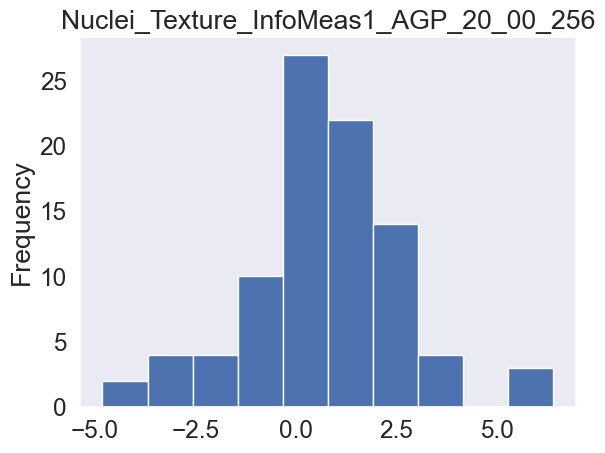

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-treated 1 day(s) vs. AgNP 40 1 day(s): t-test independent samples, P_val:2.667e-03 t=-3.481e+00
Non-treated 15 day(s) vs. AgNP 40 15 day(s): t-test independent samples, P_val:7.412e-02 t=-1.896e+00
Non-treated 30 day(s) vs. AgNP 40 30 day(s): t-test independent samples, P_val:3.205e-02 t=-2.324e+00
Non-treated 1 day(s) vs. AgNP 100 1 day(s): t-test independent samples, P_val:7.790e-03 t=-2.994e+00
Non-treated 15 day(s) vs. AgNP 100 15 day(s): t-test independent samples, P_val:2.689e-01 t=-1.141e+00
Non-treated 30 day(s) vs. AgNP 100 30 day(s): t-test independent samples, P_val:5.391e-03 t=-3.162e+00


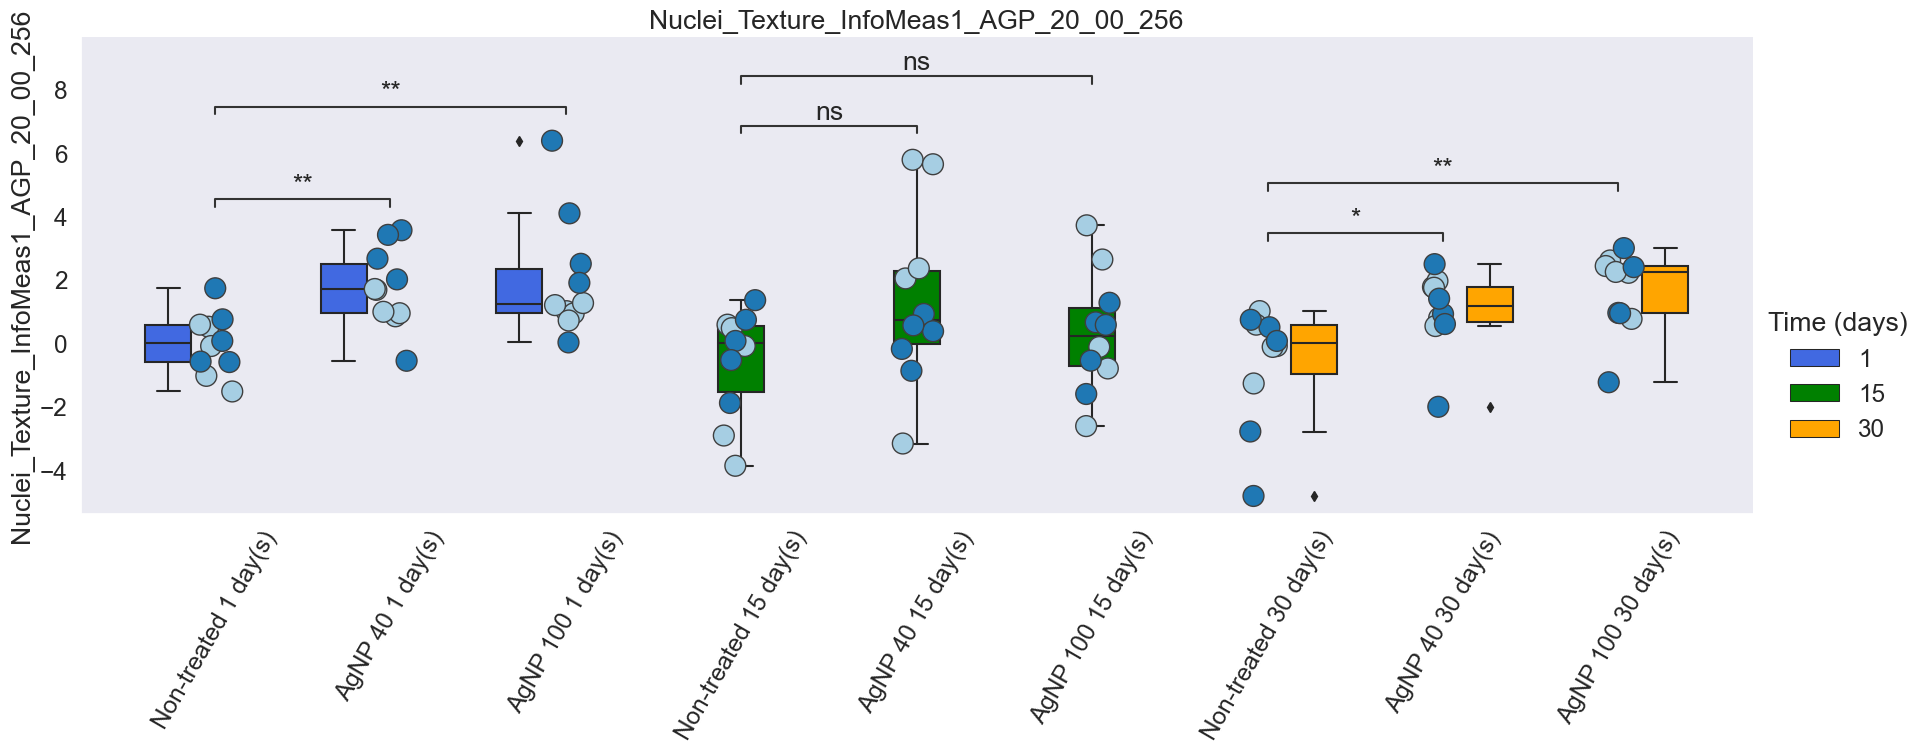

In [151]:
feature = "Nuclei_Texture_InfoMeas1_AGP_20_00_256"
feat_stat.plot_and_stat(df, feature, label_col, time_colors, order_to_plot = order_plot, hue_order_boxplot = time_order, pairs_stat = pairs_to_test)

Not normal distribution, pval equal 0.023975798615518323. Using Mann-Whitney.


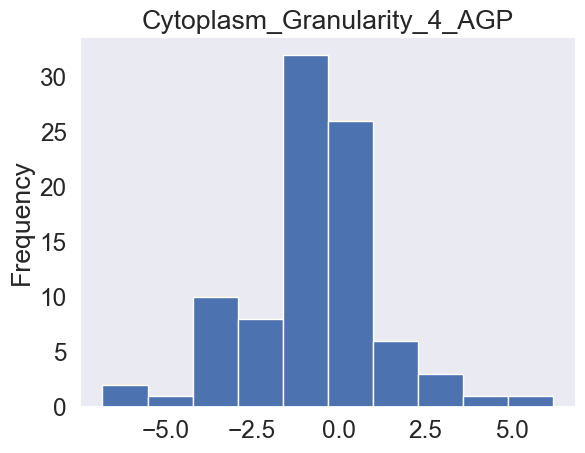

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-treated 1 day(s) vs. AgNP 40 1 day(s): Mann-Whitney-Wilcoxon test two-sided, P_val:7.285e-03 U_stat=8.600e+01
Non-treated 15 day(s) vs. AgNP 40 15 day(s): Mann-Whitney-Wilcoxon test two-sided, P_val:8.897e-02 U_stat=7.300e+01
Non-treated 30 day(s) vs. AgNP 40 30 day(s): Mann-Whitney-Wilcoxon test two-sided, P_val:1.405e-01 U_stat=7.000e+01
Non-treated 1 day(s) vs. AgNP 100 1 day(s): Mann-Whitney-Wilcoxon test two-sided, P_val:1.620e-01 U_stat=6.900e+01
Non-treated 15 day(s) vs. AgNP 100 15 day(s): Mann-Whitney-Wilcoxon test two-sided, P_val:7.566e-02 U_stat=7.400e+01
Non-treated 30 day(s) vs. AgNP 100 30 day(s): Mann-Whitney-Wilcoxon test two-sided, P_val:1.726e-02 U_stat=8.200e+01


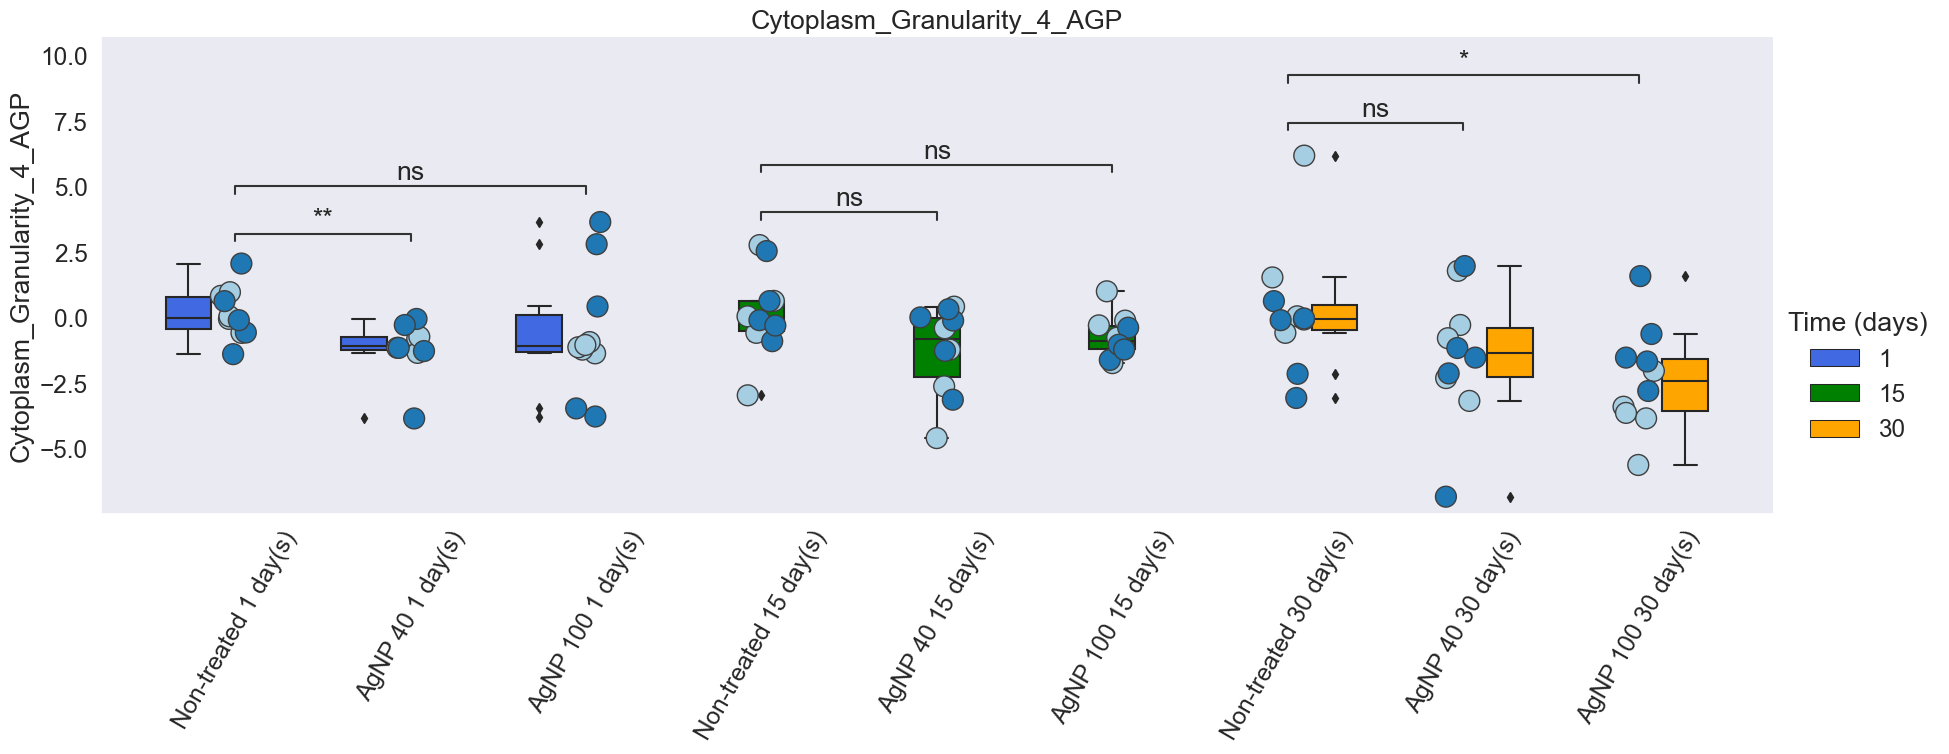

In [152]:
feature = "Cytoplasm_Granularity_4_AGP"
feat_stat.plot_and_stat(df, feature, label_col, time_colors, order_to_plot = order_plot, hue_order_boxplot = time_order, pairs_stat = pairs_to_test)